In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

### Read Data from CSV

In [25]:
data = pd.read_csv('Poverty.csv')

In [26]:
data.head()

,Country or Area,Year,Value,Value Footnotes
0,Albania,2012,1.1,1.0
1,Albania,2008,0.4,1.0
2,Albania,2005,1.1,1.0
3,Albania,2002,2.0,1.0
4,Albania,1996,1.1,1.0


#### lets drop extra column Value Footnotes

In [27]:
# Read data from csv and print the head
data = data.drop(columns=['Value Footnotes'])
data.head(5)

,Country or Area,Year,Value
0,Albania,2012,1.1
1,Albania,2008,0.4
2,Albania,2005,1.1
3,Albania,2002,2.0
4,Albania,1996,1.1


#### Get data insights

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 3 columns):
Country or Area    1614 non-null object
Year               1614 non-null object
Value              1602 non-null float64
dtypes: float64(1), object(2)
memory usage: 37.9+ KB


#### it seems column Value has some missing values or NaN 

In [29]:
vals = data['Value']

In [30]:
d = data[ vals.isna() ]
d

,Country or Area,Year,Value
1602,footnoteSeqID,Footnote,NaN
1603,1,Estimated from unit-record consumption data.,NaN
1604,2,Estimated from grouped consumption data.,NaN
1605,3,Estimated from unit-record income data. Urban ...,NaN
1606,4,Estimated from grouped income data. Urban only...,NaN
1607,5,Estimated from unit-record income data.,NaN
1608,6,Estimated from grouped income data.,NaN
1609,7,Estimated from grouped consumption data. Natio...,NaN
1610,8,"Retrieved on Sept 19, 2018 from World Bank, Po...",NaN
1611,9,Estimated from unit-record consumption data. P...,NaN


##### lets drop this entries

In [31]:
data  = data [0:1602] 

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 3 columns):
Country or Area    1602 non-null object
Year               1602 non-null object
Value              1602 non-null float64
dtypes: float64(1), object(2)
memory usage: 37.6+ KB


In [54]:
data['Country or Area'].nunique()

175

### Lets normalize data

In [55]:
# Normalize the value column and drop old column

# Create x, where x the 'Value' column's values as floats
x = data[['Value']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='Value',inplace=True)

In [56]:
# Check new dataframe with normalized value
data_new.head()

,Country or Area,Year,normalized
0,Albania,2012,0.011690
1,Albania,2008,0.004251
2,Albania,2005,0.011690
3,Albania,2002,0.021254
4,Albania,1996,0.011690


#### Using tsfresh to extract features from data

In [57]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data_new, column_id="Country or Area", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:16<00:00,  1.32s/it]


In [58]:
#Check extracted features
extracted_features.head()

variable,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Albania,0.000880,0.034006,-0.207301,-0.009288,0.123878,NaN,NaN,NaN,NaN,NaN,...,-0.000002,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000029,0.0
Algeria,0.008731,0.063762,-0.662088,-0.662088,0.236452,NaN,NaN,NaN,NaN,NaN,...,-0.000297,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000822,0.0
Angola,0.220140,0.023379,-1.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000137,0.0
Argentina,0.063581,0.308183,0.080516,0.120244,0.337182,0.085724,-0.164281,-0.010627,0.063809,NaN,...,0.000003,1.680193e-08,0.000004,0.0,2.0,0.0,0.0,0.0,0.001046,0.0
Armenia,0.129814,0.243358,-0.419327,-0.443550,0.443094,0.205101,-1.000000,-0.180659,0.000000,NaN,...,-0.000626,-9.140289e-04,-0.000831,0.0,0.0,0.0,0.0,0.0,0.003868,0.0


In [59]:
#Check shape of new data with extracted features
extracted_features.shape

(175, 794)

In [60]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

568

In [61]:
# it seems 568 columns out of 794 have some null values

In [62]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_tre

In [63]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [64]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()

In [65]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 0
        data_after_impute.at[i,'label'] = val
    elif da['id'] not in list_developed_countries:
        val = 1
        data_after_impute.at[i,'label'] = val

In [66]:
# check new df with added column as label 
data_after_impute.head()

variable,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,Albania,0.000880,0.034006,-0.207301,-0.009288,0.123878,0.103082,-1.000000,-0.056323,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,1
1,Algeria,0.008731,0.063762,-0.662088,-0.662088,0.236452,0.103082,-1.000000,-0.056323,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000822,0.0,1
2,Angola,0.220140,0.023379,-1.000000,-1.000000,0.000000,0.103082,-1.000000,-0.056323,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000137,0.0,1
3,Argentina,0.063581,0.308183,0.080516,0.120244,0.337182,0.085724,-0.164281,-0.010627,0.063809,...,1.680193e-08,0.000004,0.0,2.0,0.0,0.0,0.0,0.001046,0.0,1
4,Armenia,0.129814,0.243358,-0.419327,-0.443550,0.443094,0.205101,-1.000000,-0.180659,0.000000,...,-9.140289e-04,-0.000831,0.0,0.0,0.0,0.0,0.0,0.003868,0.0,1


In [67]:
#data_after_impute.to_csv('Poverty-output.csv')

In [68]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

In [69]:
y.value_counts()

1    142
0     33
Name: label, dtype: int64

In [70]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [71]:
y_test.value_counts()

1    57
0    13
Name: label, dtype: int64

#### Lets try different classifiers on the data

##### KNN

###### KNN with k ranging from 1 to 15

[0.9142857142857143, 0.9, 0.9142857142857143, 0.9142857142857143, 0.9, 0.9, 0.9, 0.9, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8714285714285714, 0.8571428571428571, 0.8571428571428571, 0.8428571428571429]


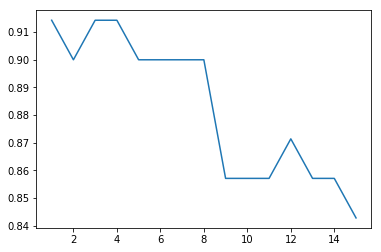

In [72]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores)  

In [74]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
print(dsf)
f1 = f1_score(y_test,pred,average='weighted') 
print('F1 Score: ',f1)
acc = accuracy_score(y_test,pred)
print('Accuracy is: ',acc)
cm = confusion_matrix(y_test,pred)

             precision    recall  f1-score   support

          0       0.89      0.62      0.73        13
          1       0.92      0.98      0.95        57

avg / total       0.91      0.91      0.91        70

F1 Score:  0.9079462909971385
Accuracy is:  0.9142857142857143


In [75]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Developed','Developing']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

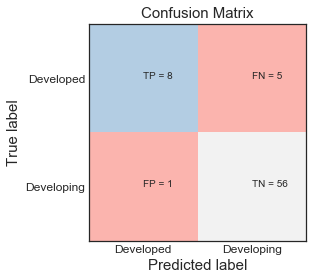

In [76]:
plotConfusion(cm)

#### Random Forest Classifier

In [77]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9248287943940117
Accuracy Score:  0.9285714285714286


#### Fine tuninng Random Forest for different number of estimators

5-------0.9079462909971385
10-------0.9248287943940117
15-------0.8901960784313725
20-------0.9114532019704433
30-------0.9409688013136287
35-------0.9248287943940117
40-------0.9409688013136287
45-------0.9248287943940117
50-------0.9248287943940117
100-------0.9248287943940117
200-------0.9248287943940117
300-------0.9248287943940117


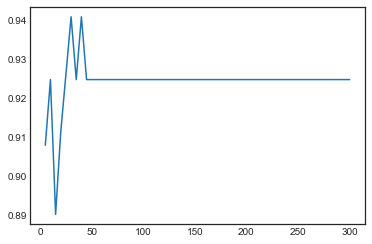

In [78]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
for i in range (0,len(estimators)):
    print(str(estimators[i]) + "-------" + str(f1_scores[i]))

#### Lets fine tune for number of features with best number of estimator from above analysis

In [79]:
rf_classifier = RandomForestClassifier(n_estimators=30, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9409688013136287
Accuracy Score:  0.9428571428571428


[0.9248287943940117, 0.9114532019704433, 0.9248287943940117, 0.9114532019704433, 0.9248287943940117, 0.8947603121516164, 0.9409688013136287, 0.9386308606647591, 0.9386308606647591, 0.9248287943940117, 0.9248287943940117]


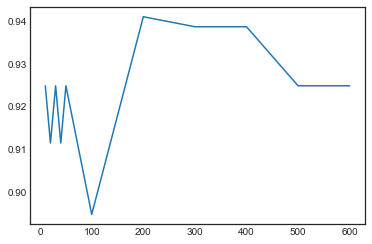

In [80]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=30,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [81]:
rf_classifier = RandomForestClassifier(n_estimators=30,max_features=200, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)

F1 Score:  0.9409688013136287
Accuracy Score:  0.9428571428571428


             precision    recall  f1-score   support

          0       0.91      0.77      0.83        13
          1       0.95      0.98      0.97        57

avg / total       0.94      0.94      0.94        70



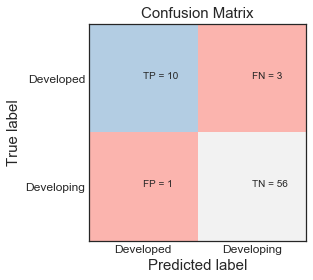

In [82]:
print(cr)
plotConfusion(cm)

#### Logistic regression model

In [84]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

F1 Score:  0.8763413659965384
Accuracy Score:  0.8714285714285714
             precision    recall  f1-score   support

          0       0.62      0.77      0.69        13
          1       0.94      0.89      0.92        57

avg / total       0.89      0.87      0.88        70



#### Extra tree classifier

In [85]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9079462909971385
Accuracy Score:  0.9142857142857143


[0.9079462909971385, 0.8947603121516164, 0.9079462909971385, 0.8947603121516164, 0.9386308606647591, 0.9386308606647591, 0.9248287943940117, 0.9248287943940117, 0.9248287943940117, 0.9248287943940117, 0.9248287943940117, 0.9386308606647591, 0.9248287943940117, 0.9248287943940117]


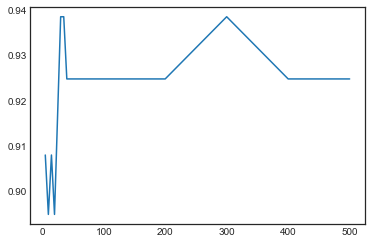

In [87]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300,400,500]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [88]:
model = ExtraTreesClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9248287943940117
Accuracy Score:  0.9285714285714286


#### fine tune for max_features

[0.9248287943940117, 0.9386308606647591, 0.9248287943940117, 0.9386308606647591, 0.9248287943940117, 0.9079462909971385, 0.9215686274509802, 0.9079462909971385, 0.8947603121516164, 0.8947603121516164, 0.9114532019704433]


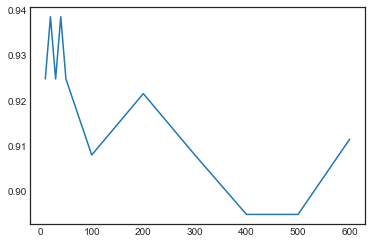

In [89]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=100,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [90]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=100,max_features=40,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)

F1 Score:  0.9386308606647591
Accuracy Score:  0.9428571428571428


             precision    recall  f1-score   support

          0       1.00      0.69      0.82        13
          1       0.93      1.00      0.97        57

avg / total       0.95      0.94      0.94        70



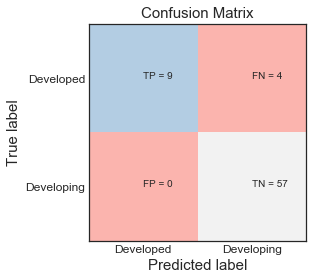

In [91]:
print(cr)
plotConfusion(cm)

#### Recursive Feature Elimination 

In [98]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 251
Best features : Index(['normalized__fft_coefficient__coeff_56__attr_"imag"',
       'normalized__fft_coefficient__coeff_56__attr_"real"',
       'normalized__fft_coefficient__coeff_57__attr_"abs"',
       'normalized__fft_coefficient__coeff_57__attr_"angle"',
       'normalized__fft_coefficient__coeff_57__attr_"imag"',
       'normalized__fft_coefficient__coeff_57__attr_"real"',
       'normalized__fft_coefficient__coeff_58__attr_"abs"',
       'normalized__fft_coefficient__coeff_58__attr_"angle"',
       'normalized__fft_coefficient__coeff_58__attr_"imag"',
       'normalized__fft_coefficient__coeff_59__attr_"angle"',
       ...
       'normalized__symmetry_looking__r_0.9',
       'normalized__symmetry_looking__r_0.9500000000000001',
       'normalized__time_reversal_asymmetry_statistic__lag_1',
       'normalized__time_reversal_asymmetry_statistic__lag_2',
       'normalized__time_reversal_asymmetry_statistic__lag_3',
       'normalized__value_count__

In [99]:
cols = X_train.columns[rfecv.support_]
X = X[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

[0.8857142857142857, 0.8571428571428571, 0.9428571428571428, 0.9285714285714286, 0.9285714285714286, 0.9, 0.9142857142857143, 0.9142857142857143, 0.9, 0.8857142857142857, 0.8857142857142857, 0.8857142857142857, 0.9, 0.9, 0.9142857142857143]


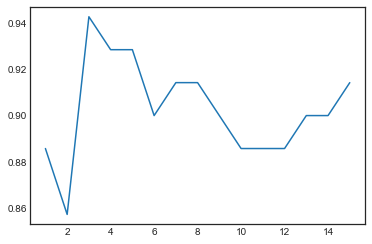

In [100]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

In [103]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
print(dsf)
f1 = f1_score(y_test,pred,average='weighted') 
print('F1 Score: ',f1)
acc = accuracy_score(y_test,pred)
print('Accuracy is: ',acc)
cm = confusion_matrix(y_test,pred)

             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.96      0.96      0.96        57

avg / total       0.94      0.94      0.94        70

F1 Score:  0.9428571428571428
Accuracy is:  0.9428571428571428


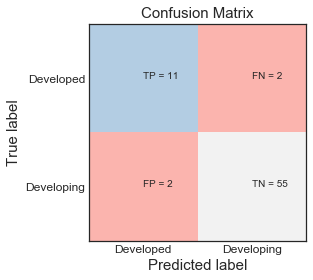

In [104]:
plotConfusion(cm)

[0.9079462909971385, 0.8947603121516164, 0.9079462909971385, 0.8947603121516164, 0.8947603121516164, 0.9079462909971385, 0.9079462909971385, 0.9079462909971385, 0.9079462909971385, 0.9079462909971385, 0.9079462909971385, 0.9215686274509802]


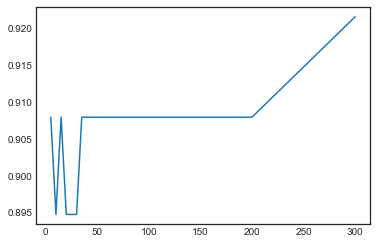

In [105]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [109]:
rf_classifier = RandomForestClassifier(n_estimators=300, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)
cm = (confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      0.62      0.76        13
          1       0.92      1.00      0.96        57

avg / total       0.93      0.93      0.92        70

Accuracy is:  0.9285714285714286


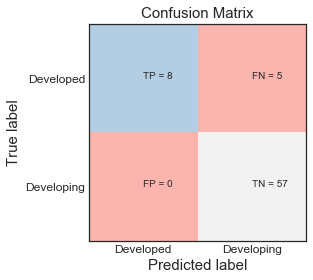

In [110]:
plotConfusion(cm)